## サポートベクトル分類器
教師あり分類問題 supervised classification problem

### Basic Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Libraries for Learning Models


In [2]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score

### 1. Data Preparation
XOR のデータを使用する

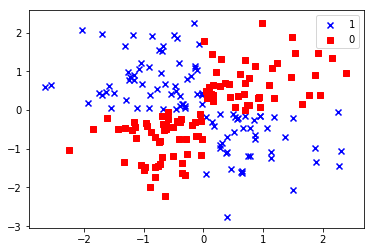

In [13]:
np.random.seed(0)
X = np.random.randn(200, 2) # 200個の2次元データ
y = np.logical_xor(X[:, 0] >0, X[:, 1]>0) # => True, False
y = np.where(y, 1, 0)

plt.scatter(X[y==1, 0], X[y==1, 1], c='b', marker='x', label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show()

### 4. Training Model
Support Vector Machine <br>
今回は カーネルの選択が重要になる

In [14]:
clf = svm.SVC(kernel='rbf', gamma=1/2, C=1.0, class_weight='balanced', random_state=0)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

### 5. Evaluation Data
K分割交差検証法を用いて性能評価を行う

In [15]:
scores = cross_val_score(clf, X, y, cv=10) # 分割数10
print('mean scores: %f'%scores.mean())
print('standard deviation', scores.std())

mean scores: 0.944950
standard deviation 0.0472709892264494


### svm.SVC
#### parameters
- C: サポートベクトルマシンにおいて誤分類をどれだけ許容するか
- kernel: カーネル関数
    - linear
    - poly
    - rbf
    - sigmoid
    - precomputed
- degree: 多項式カーネルを使用した際の次数 default=3
- gamma: ガウシアン、 シグモイド, 多項式のカーネル係数 
    - auto -> scale(v0.22)
- coef0: 多項式とシグモイドの時のカーネル関数の独立項 
- shrinking: 逐次最小問題最適化法(SMO: Sequential Minimal Optimization) において shrinking heuristic を使用する or not
- probability: if True: predict_proba
- tol: 誤差の許容値(学習終了のためのしきい値)
- cache_size: キャッシュサイズ 計算時間に影響あり
- class_weight: 
    - balanced
- verbose: ログの冗長性
- max_iter: 学習エポックの最大数
- decision_function_shape:
    - ovo: one-vs-one
    - ovr: one-vs-rest
- random_state: 乱数シード

#### attributes
- support_: サポートベクトルのインデックス
- support_vectors: サポートベクトル
- n_support_: サポートベクトル数
- dual_coef_: 決定関数の係数
- coef_: linear_kernelのみ取得可能
- intercept_: 決定関数の定数項